In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("used_carsdata.csv")
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [7]:
#lets check the info of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 793.4+ KB


In [8]:
#so here we can see that there are 14 columns and 7253 rows are there in the data
# also there are null values present in some datasets 

In [9]:
# Print column names to verify
print(df.columns.tolist())

['S.No.', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


In [10]:
df.columns = df.columns.str.strip()

In [11]:
# Extract numeric value from 'Mileage,engine , power ' column
df['Mileage_Value'] = df['Mileage'].str.extract(r'([0-9.]+)').astype(float)
df['Engine_Value'] = df['Engine'].str.extract(r'([0-9.]+)').astype(float)
df['Power_Value'] = df['Power'].str.extract(r'([0-9.]+)').astype(float)

In [12]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Mileage_Value,Engine_Value,Power_Value
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,26.60,998.0,58.16
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,19.67,1582.0,126.20
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,18.20,1199.0,88.70
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,20.77,1248.0,88.76
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,15.20,1968.0,140.80


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7207 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          1006 non-null   object 
 13  Price              6019 non-null   float64
 14  Mileage_Value      7251 non-null   float64
 15  Engine_Value       7207 non-null   float64
 16  Power_Value        7078 

In [14]:
#lets make new dataset with deropping uneccsary columns
df = df.drop(['Mileage','Power','Engine','S.No.'], axis = 1 )

In [15]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,Mileage_Value,Engine_Value,Power_Value
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,NaN,1.75,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,NaN,12.50,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61 Lakh,4.50,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,NaN,6.00,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,NaN,17.74,15.20,1968.0,140.80


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Seats              7200 non-null   float64
 8   New_Price          1006 non-null   object 
 9   Price              6019 non-null   float64
 10  Mileage_Value      7251 non-null   float64
 11  Engine_Value       7207 non-null   float64
 12  Power_Value        7078 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 736.8+ KB


In [17]:
#lets check how many null values are present in the data
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price            6247
Price                1234
Mileage_Value           2
Engine_Value           46
Power_Value           175
dtype: int64

In [18]:
# here we can see that null values are present in  total 6 colunms which are engine ,power,seats ,new_price,price

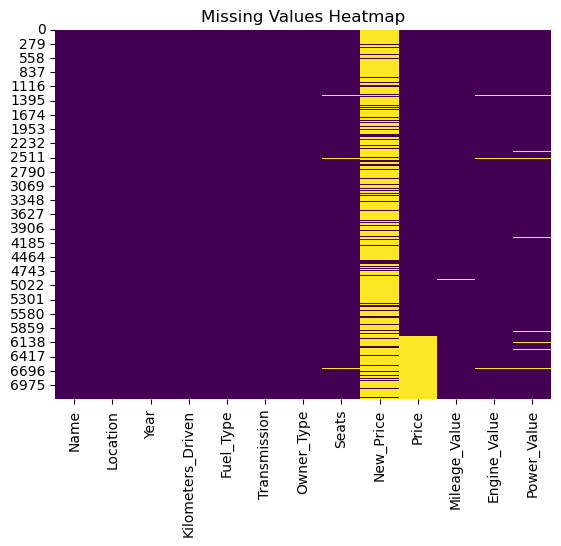

In [19]:
# lets visualize it
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.savefig("my_chart.png")
plt.show()



In [20]:
#lets see the percentage of null values present in the column
df.isnull().mean() * 100

Name                  0.000000
Location              0.000000
Year                  0.000000
Kilometers_Driven     0.000000
Fuel_Type             0.000000
Transmission          0.000000
Owner_Type            0.000000
Seats                 0.730732
New_Price            86.129877
Price                17.013650
Mileage_Value         0.027575
Engine_Value          0.634220
Power_Value           2.412795
dtype: float64

In [21]:
#so here we can see that 86% null values are present in the new price column so we have to drop that column
df.drop(columns=['New_Price'], errors='ignore', inplace=True)


In [22]:
df = df.dropna(subset=['Price'])


In [23]:
print(df.columns.tolist())

['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Seats', 'Price', 'Mileage_Value', 'Engine_Value', 'Power_Value']


In [24]:
df.columns = df.columns.str.strip()

In [25]:
#now for the rest null vlues  as these are numerical columns so we will replace it with mean 
df['Mileage_Value'].fillna(df['Mileage_Value'].median(), inplace=True)
df['Engine_Value'].fillna(df['Engine_Value'].median(), inplace=True)
df['Power_Value'].fillna(df['Power_Value'].median(), inplace=True)
df['Seats'].fillna(df['Seats'].median(), inplace=True)

In [26]:
#as if we treated the null values lets check if there any remain
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Mileage_Value        0
Engine_Value         0
Power_Value          0
dtype: int64

In [27]:
# here we can see that there are no null values present now 

In [28]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80


In [29]:
# its difficult to find cars age as its in year format and cars age is contributing factor so we will perform feature engineering on it 
from datetime import date
date.today().year
df['Car_Age']=date.today().year-df['Year']
df.head()



,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,15
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,10
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,14
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,13
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,12


In [30]:
#now we will drop the year column as it has no use 
df = df.drop("Year", axis=1 )

In [31]:
#since car name is not the imporatantr feature for the price prediction we willl divide it in to brand name and car model to extract imporatant information
df['Brand'] = df.Name.str.split().str.get(0)
df['Model'] = df.Name.str.split().str.get(1) + df.Name.str.split().str.get(2)

df[['Name','Brand','Model']]

,Name,Brand,Model
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
6014,Maruti Swift VDI,Maruti,SwiftVDI
6015,Hyundai Xcent 1.1 CRDi S,Hyundai,Xcent1.1
6016,Mahindra Xylo D4 BSIV,Mahindra,XyloD4
6017,Maruti Wagon R VXI,Maruti,WagonR


In [32]:
#now lets drop the name column as it has no use
df.drop("Name" , axis = 1 , inplace = True)

In [33]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,15,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,10,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,14,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,13,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,12,Audi,A4New


In [34]:
print(df.Brand.unique())
print(df.Brand.nunique())

['Maruti' 'Hyundai' 'Honda' 'Audi' 'Nissan' 'Toyota' 'Volkswagen' 'Tata'
 'Land' 'Mitsubishi' 'Renault' 'Mercedes-Benz' 'BMW' 'Mahindra' 'Ford'
 'Porsche' 'Datsun' 'Jaguar' 'Volvo' 'Chevrolet' 'Skoda' 'Mini' 'Fiat'
 'Jeep' 'Smart' 'Ambassador' 'Isuzu' 'ISUZU' 'Force' 'Bentley'
 'Lamborghini']
31


In [35]:
#here we can see the name Isuzu , land , mini are incorrect so we have to correct them
searchfor = ['Isuzu' ,'ISUZU','Mini','Land']
df[df.Brand.str.contains('|'.join(searchfor))].head(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Brand,Model
13,Delhi,72000,Diesel,Automatic,First,5.0,27.00,12.70,2179.0,187.70,11,Land,RoverRange
14,Pune,85000,Diesel,Automatic,Second,5.0,17.50,0.00,2179.0,115.00,13,Land,RoverFreelander
176,Jaipur,8525,Diesel,Automatic,Second,5.0,23.00,16.60,1998.0,112.00,8,Mini,CountrymanCooper
191,Coimbatore,36091,Diesel,Automatic,First,5.0,55.76,12.70,2179.0,187.70,7,Land,RoverRange
228,Kochi,26327,Petrol,Automatic,First,4.0,35.67,16.82,1998.0,189.08,8,Mini,CooperConvertible


In [36]:
df["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [37]:
#lets get the statistical information about the data
df.describe()

,Kilometers_Driven,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age
count,6.019000e+03,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000,6019.000000
mean,5.873838e+04,5.276790,9.479468,18.134966,1620.509221,112.883539,11.641801
std,9.126884e+04,0.806346,11.187917,4.581528,599.635458,53.283701,3.269742
min,1.710000e+02,0.000000,0.440000,0.000000,72.000000,34.200000,6.000000
25%,3.400000e+04,5.000000,3.500000,15.170000,1198.000000,78.000000,9.000000
50%,5.300000e+04,5.000000,5.640000,18.150000,1493.000000,97.700000,11.000000
75%,7.300000e+04,5.000000,9.950000,21.100000,1969.000000,138.030000,14.000000
max,6.500000e+06,10.000000,160.000000,33.540000,5998.000000,560.000000,27.000000


In [38]:
# from here we caan say that omn an average cars running is 58k kilomeeters and the max running is 650000 KM which has huge differance
#it seems like an outlier we can remove it 
#in Engine, Power data seems to be right skewed and has outliers 
# Min value of Mileage shows 0 cars won’t be sold with 0 mileage. This sounds like a data entry issue
#The average number of seats in a car is 5. car seat is an important feature in price contribution.
#The max price of a used car is 160 which is quite weird, such a high price for used cars. There may be an outlier or data entry issue.

In [39]:
#before further steps lets seprate the categricla and numericale data
cat_cols=df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Location', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Brand',
       'Model'],
      dtype='object')
Numerical Variables:
['Kilometers_Driven', 'Seats', 'Price', 'Mileage_Value', 'Engine_Value', 'Power_Value', 'Car_Age']


In [40]:
# UNIVARIATE ANLYSIS


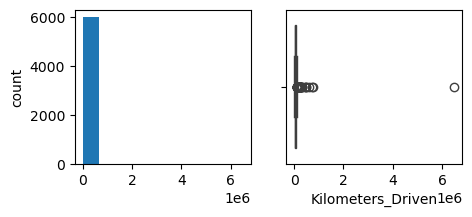

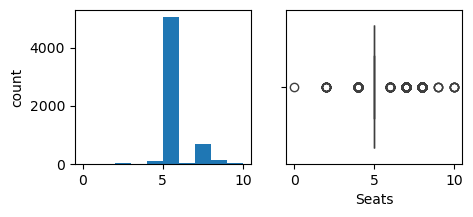

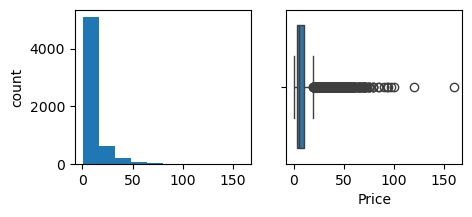

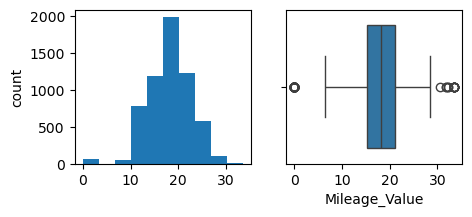

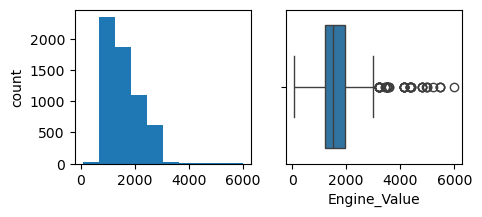

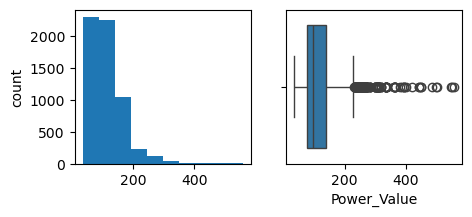

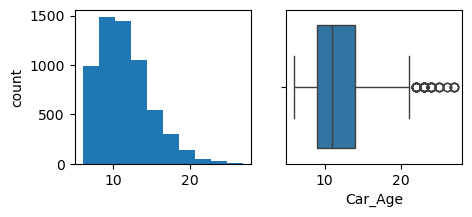

In [41]:
for col in num_cols:
    plt.figure(figsize = (5, 2))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [42]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Brand,Model
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,15,Maruti,WagonR
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,10,Hyundai,Creta1.6
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,14,Honda,JazzV
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,13,Maruti,ErtigaVDI
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,12,Audi,A4New


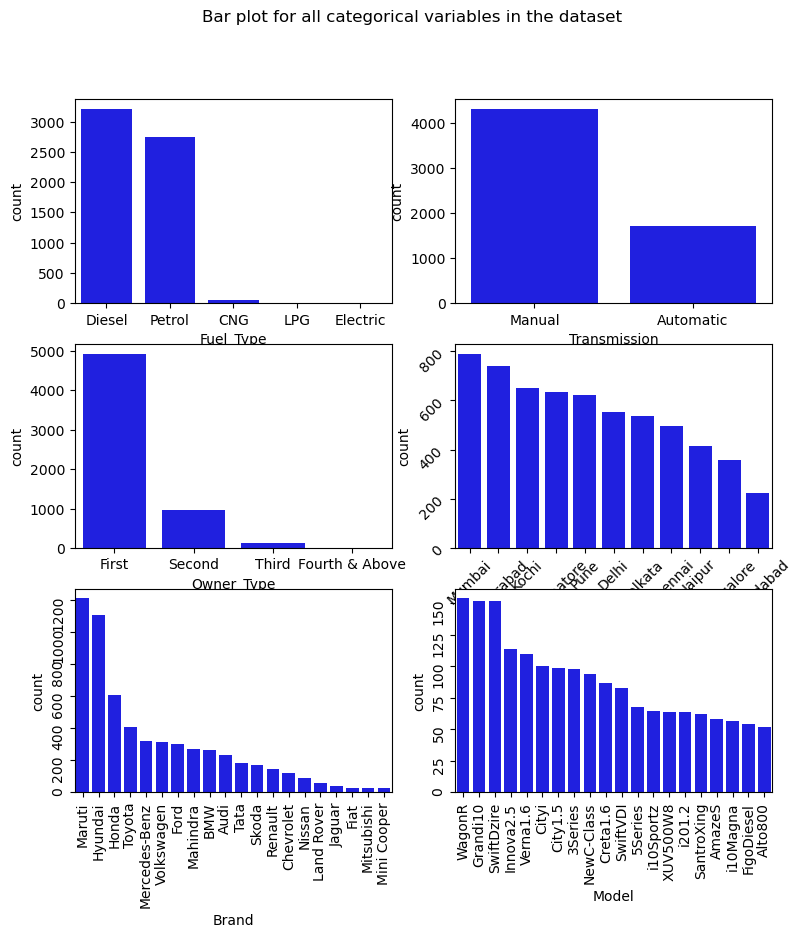

In [43]:
fig, axes = plt.subplots(3, 2, figsize = (9, 9))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = df, color = 'blue', 
              order = df['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = df, color = 'blue', 
              order = df['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = df, color = 'blue', 
              order = df['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = df, color = 'blue', 
              order = df['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = df, color = 'blue', 
              order = df['Brand'].value_counts().head(20).index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = df, color = 'blue', 
              order = df['Model'].value_counts().head(20).index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

In [44]:
#from here we can say that Mumbai has the highest number of cars available for purchase, followed by Hyderabad and Coimbatore
# ~53% of cars have fuel type as Diesel this shows diesel cars provide higher performance
#~72% of cars have manual transmissi
#~82 % of cars are First owned cars. This shows most of the buyers prefer to purchase first-owner cars
#~20% of cars belong to the brand Maruti followed by 19% of cars belonging to Hyundai
#wagonar ranks first among all models which are available for purchase

In [45]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [46]:
log_transform(df,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Index: 6019 entries, 0 to 6018
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               6019 non-null   object 
 1   Kilometers_Driven      6019 non-null   int64  
 2   Fuel_Type              6019 non-null   object 
 3   Transmission           6019 non-null   object 
 4   Owner_Type             6019 non-null   object 
 5   Seats                  6019 non-null   float64
 6   Price                  6019 non-null   float64
 7   Mileage_Value          6019 non-null   float64
 8   Engine_Value           6019 non-null   float64
 9   Power_Value            6019 non-null   float64
 10  Car_Age                6019 non-null   int64  
 11  Brand                  6019 non-null   object 
 12  Model                  6019 non-null   object 
 13  Kilometers_Driven_log  6019 non-null   float64
 14  Price_log              6019 non-null   float64
dtypes: float6

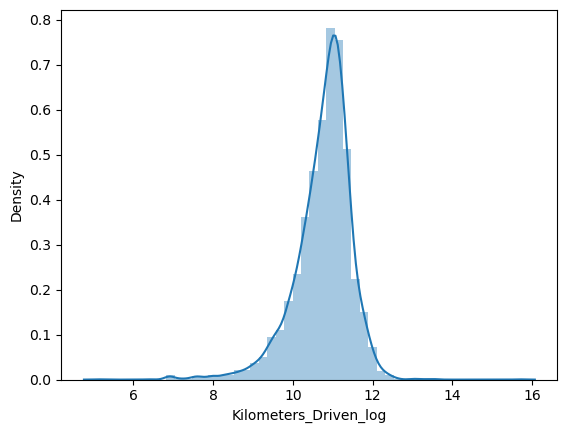

In [47]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(df["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log");

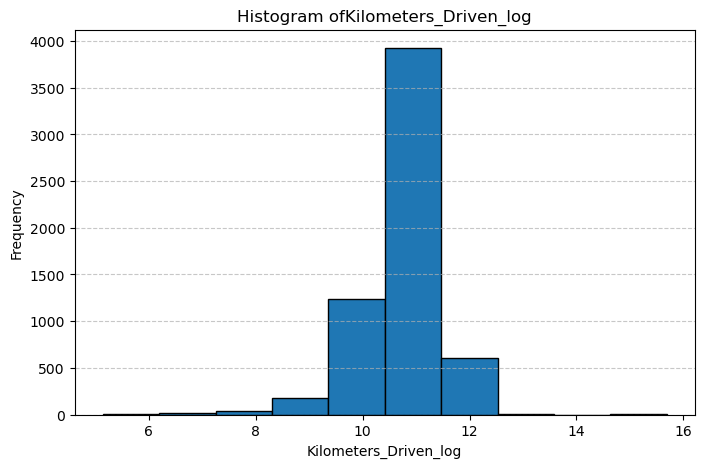

In [48]:
# Plot histogram for Kilometers_Driven
plt.figure(figsize=(8,5))
plt.hist(df['Kilometers_Driven_log'], bins=10, edgecolor='black')

plt.title("Histogram ofKilometers_Driven_log")
plt.xlabel("Kilometers_Driven_log")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

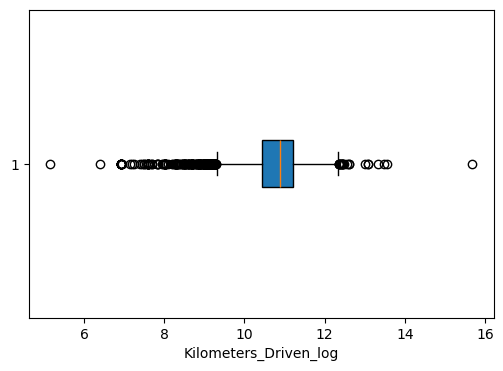

In [49]:

# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(df['Kilometers_Driven_log'], vert=False, patch_artist=True)

plt.xlabel('Kilometers_Driven_log')
plt.show()

In [50]:
# IQR method
Q1 = df["Kilometers_Driven_log"].quantile(0.25)
Q3 = df["Kilometers_Driven_log"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound, " Upper Bound:", upper_bound)
df_capped = df.copy()
df_capped["Kilometers_Driven_log"] = df_capped["Kilometers_Driven_log"].apply(
    lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x)
)
print("\nData after capping outliers:\n", df_capped)


Lower Bound: 9.287967428799956  Upper Bound: 12.34436309492887

Data after capping outliers:
         Location  Kilometers_Driven Fuel_Type Transmission Owner_Type  Seats  \
0         Mumbai              72000       CNG       Manual      First    5.0   
1           Pune              41000    Diesel       Manual      First    5.0   
2        Chennai              46000    Petrol       Manual      First    5.0   
3        Chennai              87000    Diesel       Manual      First    7.0   
4     Coimbatore              40670    Diesel    Automatic     Second    5.0   
...          ...                ...       ...          ...        ...    ...   
6014       Delhi              27365    Diesel       Manual      First    5.0   
6015      Jaipur             100000    Diesel       Manual      First    5.0   
6016      Jaipur              55000    Diesel       Manual     Second    8.0   
6017     Kolkata              46000    Petrol       Manual      First    5.0   
6018   Hyderabad          

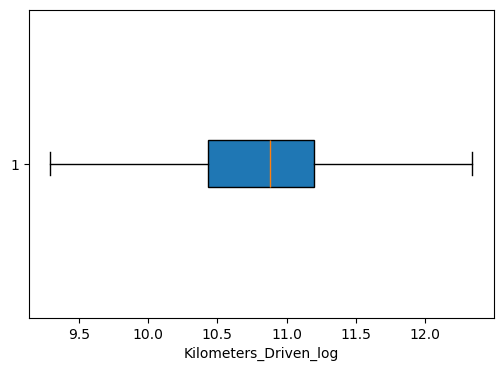

In [51]:
# Boxplot
plt.figure(figsize=(6,4))
plt.boxplot(df_capped['Kilometers_Driven_log'], vert=False, patch_artist=True)

plt.xlabel('Kilometers_Driven_log')
plt.show()

In [52]:
df.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'Price', 'Mileage_Value', 'Engine_Value',
       'Power_Value', 'Car_Age', 'Brand', 'Model', 'Kilometers_Driven_log',
       'Price_log'],
      dtype='object')

In [53]:
#bivariate analysis

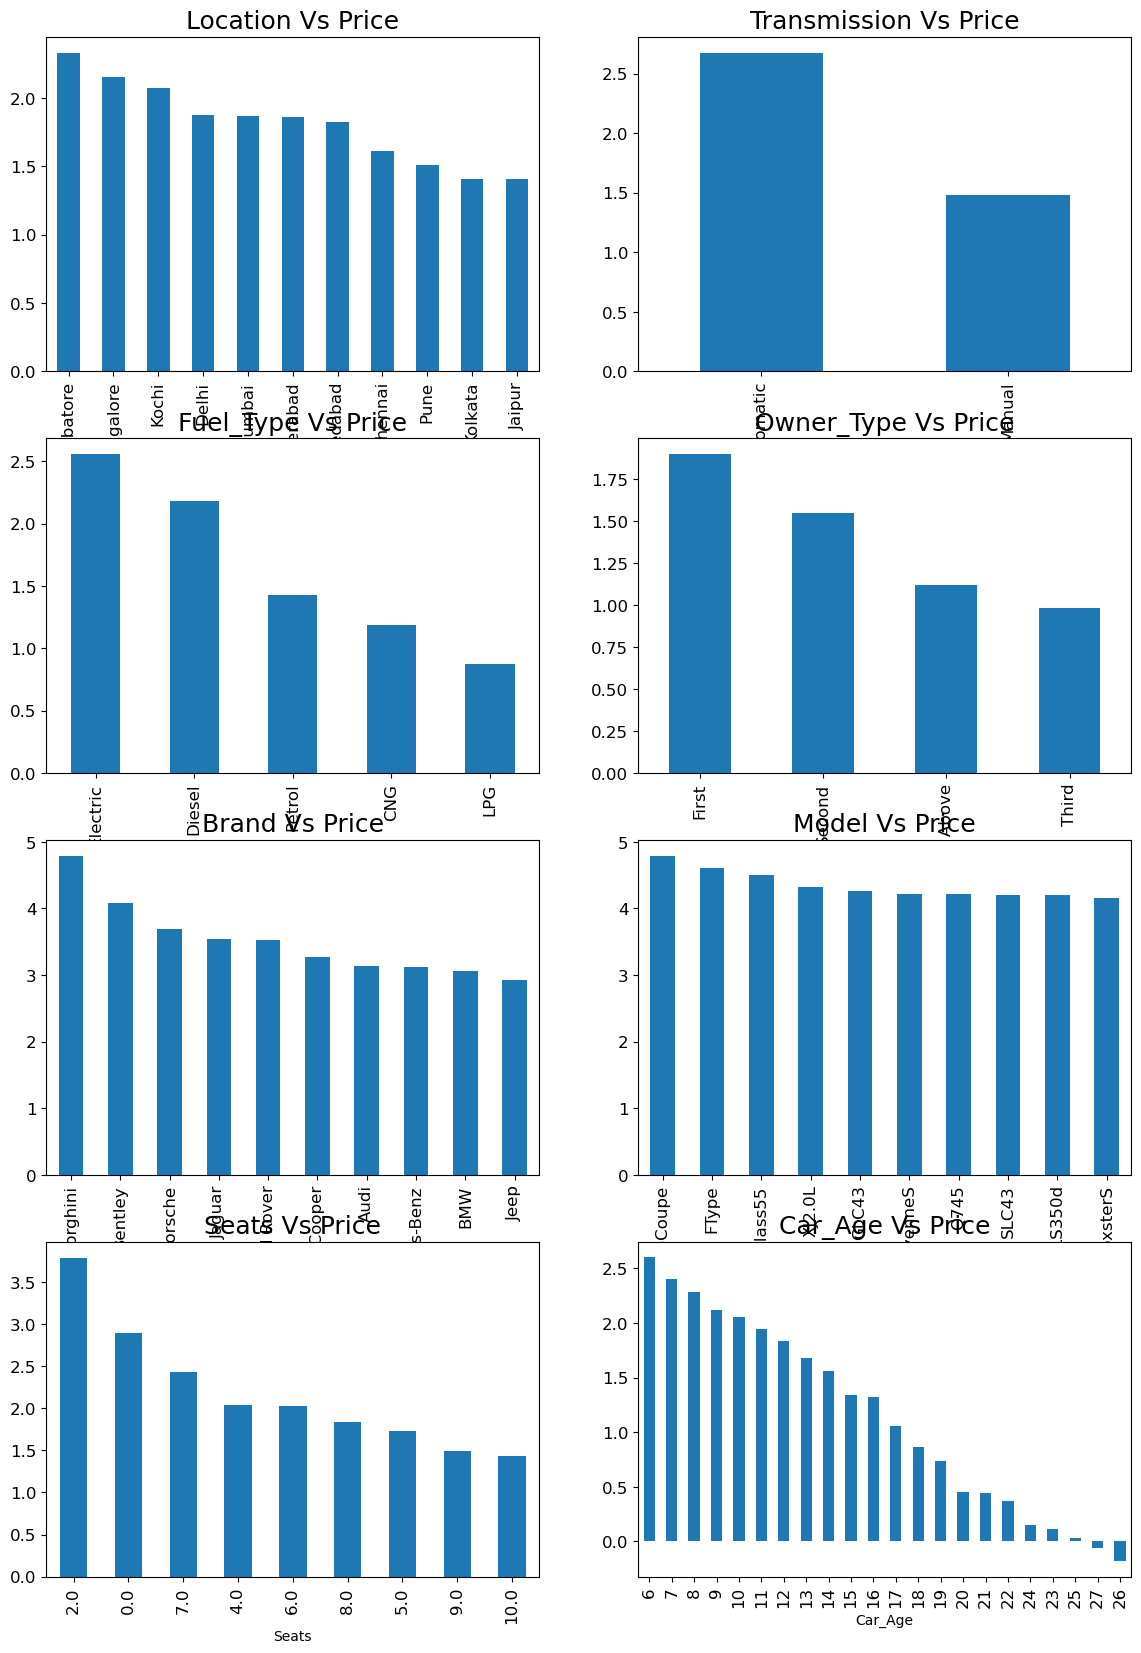

<Figure size 640x480 with 0 Axes>

In [54]:
fig, axarr = plt.subplots(4, 2, figsize=(14, 20))
df.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
df.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
df.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
df.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
df.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
df.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
df.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
df.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.savefig("car_price_analysis.png", dpi=300, bbox_inches='tight')
plt.show()
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=2.0)
sns.despine()

In [55]:
#The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
#Automatic cars have more price value than manual
#electric car has more price filowed ny disel,lpg has the lowest price
#First-owner cars are higher in price, followed by a second
#Lamborghini brand is the highest in price
#Gallardocoupe Model is the highest in price
# 2 Seater has the highest price followed by 7 Seater
#The latest model cars are high in price




In [56]:
#Multivariate analysis

df_numeric = df.select_dtypes(include=['int64', 'float64'])
df_numeric.corr()


,Kilometers_Driven,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Kilometers_Driven_log,Price_log
Kilometers_Driven,1.000000,0.082782,-0.011493,-0.065253,0.090890,0.032080,0.173048,0.417725,-0.047809
Seats,0.082782,1.000000,0.052811,-0.299632,0.393368,0.102470,-0.015204,0.189545,0.164220
Price,-0.011493,0.052811,1.000000,-0.306588,0.657347,0.769711,-0.305327,-0.185937,0.850189
Mileage_Value,-0.065253,-0.299632,-0.306588,1.000000,-0.586404,-0.497666,-0.321534,-0.134057,-0.255092
Engine_Value,0.090890,0.393368,0.657347,-0.586404,1.000000,0.860410,0.050086,0.148218,0.684174
Power_Value,0.032080,0.102470,0.769711,-0.497666,0.860410,1.000000,-0.024195,0.013306,0.756958
Car_Age,0.173048,-0.015204,-0.305327,-0.321534,0.050086,-0.024195,1.000000,0.498021,-0.504969
Kilometers_Driven_log,0.417725,0.189545,-0.185937,-0.134057,0.148218,0.013306,0.498021,1.000000,-0.204300
Price_log,-0.047809,0.164220,0.850189,-0.255092,0.684174,0.756958,-0.504969,-0.204300,1.000000


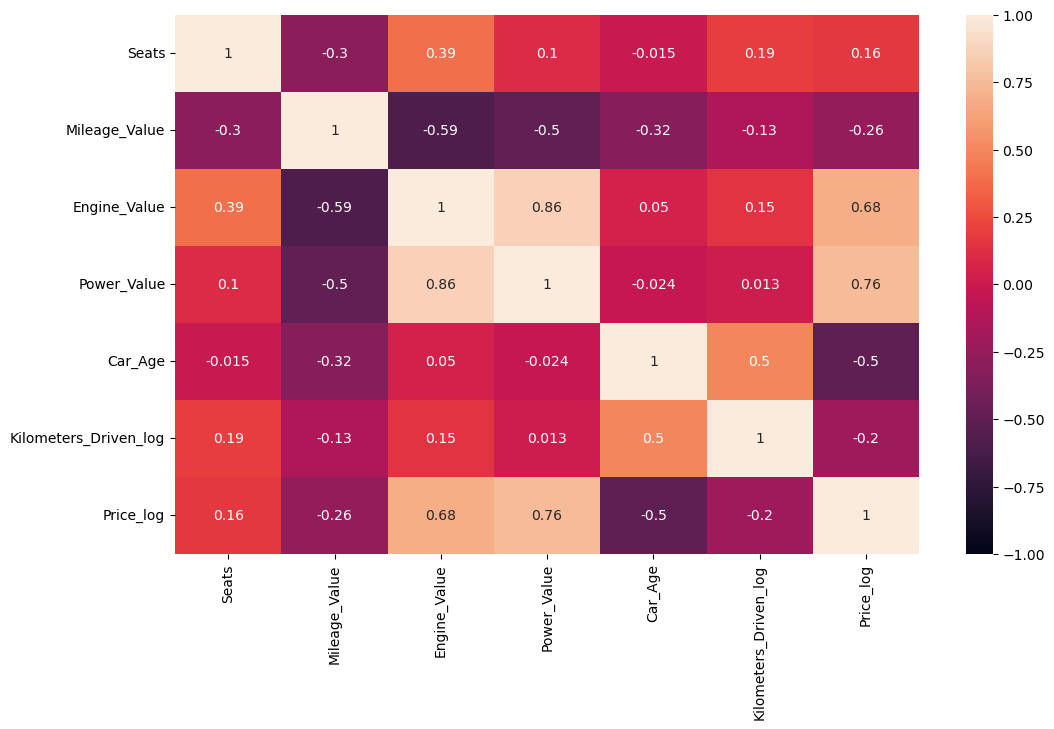

In [57]:
plt.figure(figsize=(12, 7))
sns.heatmap(df_numeric.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [58]:
#Mileage value has negative correlation  with engine value and power value -0.58 and -0.5 respectivly 
#engine value has strong positive correlation  with power value and price 0.85 and 0.61 respectivly
#power value has strong positive crrelation with price
#Car age has positive correlation with kilometers driven and negative correlation with  price


In [59]:
df.head()

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Brand,Model,Kilometers_Driven_log,Price_log
0,Mumbai,72000,CNG,Manual,First,5.0,1.75,26.60,998.0,58.16,15,Maruti,WagonR,11.184421,0.559616
1,Pune,41000,Diesel,Manual,First,5.0,12.50,19.67,1582.0,126.20,10,Hyundai,Creta1.6,10.621327,2.525729
2,Chennai,46000,Petrol,Manual,First,5.0,4.50,18.20,1199.0,88.70,14,Honda,JazzV,10.736397,1.504077
3,Chennai,87000,Diesel,Manual,First,7.0,6.00,20.77,1248.0,88.76,13,Maruti,ErtigaVDI,11.373663,1.791759
4,Coimbatore,40670,Diesel,Automatic,Second,5.0,17.74,15.20,1968.0,140.80,12,Audi,A4New,10.613246,2.875822


In [60]:
#now lets encode the categorical features
cat_cols = ['Fuel_Type', 'Transmission', 'Location', 'Brand', 'Model']
from sklearn.preprocessing import OneHotEncoder

# create encoder
encoder = OneHotEncoder(sparse_output=False, drop=None)

# fit and transform selected categorical columns
encoded_array = encoder.fit_transform(df[cat_cols])

# make it a DataFrame with proper column names
encoded_df = pd.DataFrame(encoded_array, columns=encoder.get_feature_names_out(cat_cols))

# merge back into original dataframe
df_encoded = pd.concat([df.drop(columns=cat_cols), encoded_df], axis=1)


In [61]:
df_encoded.head()

,Kilometers_Driven,Owner_Type,Seats,Price,Mileage_Value,Engine_Value,Power_Value,Car_Age,Kilometers_Driven_log,Price_log,...,Model_i201.4,Model_i202015-2017,Model_i20Active,Model_i20Asta,Model_i20Diesel,Model_i20Era,Model_i20Magna,Model_i20Sportz,Model_redi-GOS,Model_redi-GOT
0,72000,First,5.0,1.75,26.60,998.0,58.16,15,11.184421,0.559616,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,41000,First,5.0,12.50,19.67,1582.0,126.20,10,10.621327,2.525729,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,46000,First,5.0,4.50,18.20,1199.0,88.70,14,10.736397,1.504077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,87000,First,7.0,6.00,20.77,1248.0,88.76,13,11.373663,1.791759,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,40670,Second,5.0,17.74,15.20,1968.0,140.80,12,10.613246,2.875822,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# encode the column
df_encoded['Owner_Type'] = le.fit_transform(df_encoded['Owner_Type'])


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [65]:
X = df_encoded.drop(['Price_log','Price'] , axis = 1 )
y = df_encoded['Price_log']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


df.head()

In [84]:
df1.head()


,Kilometers_Driven,Kilometers_Driven_log,Price,Price_log
0,72000,11.184421,1.75,0.559616
1,41000,10.621327,12.50,2.525729
2,46000,10.736397,4.50,1.504077
3,87000,11.373663,6.00,1.791759
4,40670,10.613246,17.74,2.875822


In [67]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [68]:
# Predict on test data
y_pred = model.predict(X_test)

# Metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.058465309214145965
R^2 Score: 0.9248245104026822


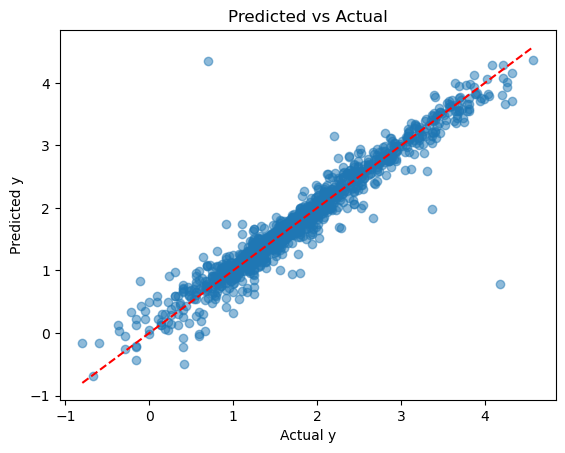

In [69]:
# Predict values for plotting the regression line

# Plot predicted vs actual
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual y')
plt.ylabel('Predicted y')
plt.title('Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # 45-degree line
plt.show()

In [70]:
#from here we can see that the line is very much lninear and the points are tightly clustersd aroround the line 
#that means the model predictions are accurate and good fit ""

In [71]:
# lets evluate with RandomForestReggresor
from sklearn.model_selection import cross_val_score as cv
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [72]:
#predicting the target variable
y_pred = model.predict(X_test)
X_train
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.4f}")


RMSE: 0.23
R² Score: 0.9302


In [73]:
# we can see that models performance is improved 

In [79]:
!pip install xgboost


In [80]:
from xgboost import XGBRegressor

# Create XGBoost regressor model
xgb_model = XGBRegressor(
    n_estimators=100,      # number of trees
    learning_rate=0.1,     # step size shrinkage
    max_depth=6,           # max tree depth
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred = xgb_model.predict(X_test)

# Evaluate model performance
rmse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 0.05


In [81]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:.2f}")

R-squared: 0.93
